In [4]:
!pip install tensorflow opencv-python mediapipe sklearn matplotlib

     ---------------------------------------- 49.8/49.8 MB 3.3 MB/s eta 0:00:00
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2936 sha256=477ea03fd7cea39b0d771ff267addaee0145b20eb526dac6720a8b8a0284cb99
  Stored in directory: c:\users\ankit\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built sklearn


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


In [2]:
# Holistic model
mp_holistic = mp.solutions.holistic

# Drawing utilities
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image,model):
    
    # Color conversion BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Image is no longer writeable
    image.flags.writeable = False
    
    # Make prediction
    results = model.process(image)
    
    # Image is now writeable
    image.flags.writeable = True
    
    # Color conversion RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [4]:
def draw_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=1, circle_radius=1)
                             )
    
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=1, circle_radius=1)
                             )
    
    # Draw right hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=1, circle_radius=1)
                             )    

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image,results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
cap.release()
cv2.destroyAllWindows()

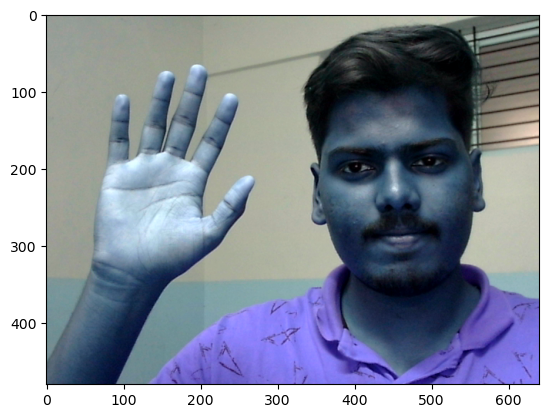

In [8]:
plt.imshow(frame)

In [9]:
draw_landmarks(frame, results)

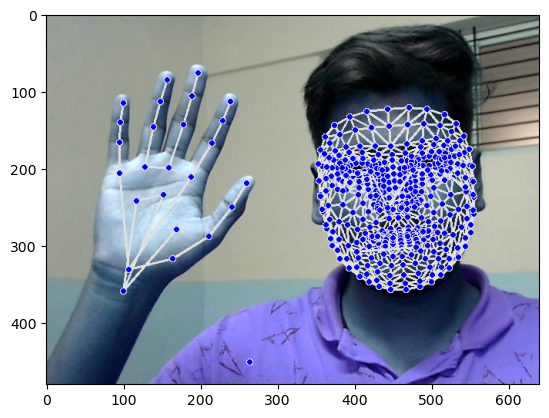

In [10]:
plt.imshow(frame)

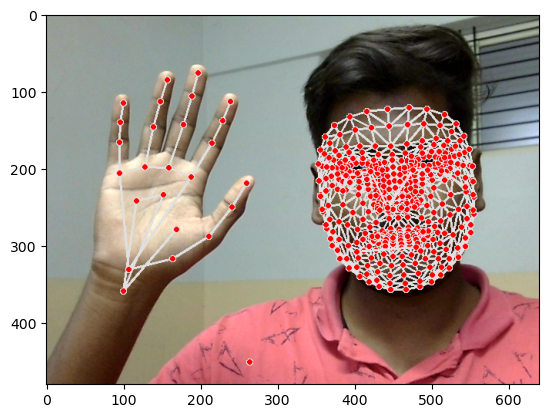

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face, lh, rh])

In [15]:
extract_keypoints(results).shape

(1662,)

In [16]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello','thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [17]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [18]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: 
    
    # Loop through actions
    for action in actions:
        
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                
                # Read feed
                ret, frame = cap.read()
                
                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)
                
                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                
                # Export keypoints    
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                # Show to screen
                cv2.imshow('OpenCV Feed', image)
                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}

In [21]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [23]:
np.array(sequences).shape

(90, 30, 1662)

In [24]:
np.array(labels).shape

(90,)

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(90, 30, 1662)

In [27]:
y = to_categorical(labels).astype(int)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [29]:
X_train.shape

(85, 30, 1662)

In [30]:
X_test.shape

(5, 30, 1662)

In [31]:
y_train.shape

(85, 3)

In [32]:
y_test.shape

(5, 3)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [34]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [35]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape = (30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [36]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [37]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 76ms/step - loss: 7.9472 - categorical_accuracy: 0.3882
Epoch 2/2000
3/3 [==============================] - 0s 75ms/step - loss: 7.8325 - categorical_accuracy: 0.4353
Epoch 3/2000
3/3 [==============================] - 0s 76ms/step - loss: 4.4482 - categorical_accuracy: 0.3059
Epoch 4/2000
3/3 [==============================] - 0s 73ms/step - loss: 4.0829 - categorical_accuracy: 0.2824
Epoch 5/2000
3/3 [==============================] - 0s 71ms/step - loss: 3.4613 - categorical_accuracy: 0.2941
Epoch 6/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.4894 - categorical_accuracy: 0.4706
Epoch 7/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.7389 - categorical_accuracy: 0.3294
Epoch 8/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.1202 - categorical_accuracy: 0.3529
Epoch 9/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0198 - categorical_accuracy: 0.5176
E

3/3 [==============================] - 0s 68ms/step - loss: 1.6766 - categorical_accuracy: 0.4118
Epoch 75/2000
3/3 [==============================] - 0s 67ms/step - loss: 11.8879 - categorical_accuracy: 0.3529
Epoch 76/2000
3/3 [==============================] - 0s 72ms/step - loss: 24.1846 - categorical_accuracy: 0.3176
Epoch 77/2000
3/3 [==============================] - 0s 74ms/step - loss: 5.7070 - categorical_accuracy: 0.3412
Epoch 78/2000
3/3 [==============================] - 0s 68ms/step - loss: 8.4067 - categorical_accuracy: 0.3294
Epoch 79/2000
3/3 [==============================] - 0s 70ms/step - loss: 8.4984 - categorical_accuracy: 0.3647
Epoch 80/2000
3/3 [==============================] - 0s 69ms/step - loss: 5.6048 - categorical_accuracy: 0.3647
Epoch 81/2000
3/3 [==============================] - 0s 78ms/step - loss: 6.0193 - categorical_accuracy: 0.3412
Epoch 82/2000
3/3 [==============================] - 0s 64ms/step - loss: 3.0545 - categorical_accuracy: 0.2588
Epoc

3/3 [==============================] - 0s 63ms/step - loss: 1.0987 - categorical_accuracy: 0.3176
Epoch 147/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0987 - categorical_accuracy: 0.3176
Epoch 148/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0987 - categorical_accuracy: 0.3176
Epoch 149/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0987 - categorical_accuracy: 0.3176
Epoch 150/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0987 - categorical_accuracy: 0.3176
Epoch 151/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0987 - categorical_accuracy: 0.3176
Epoch 152/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0987 - categorical_accuracy: 0.3176
Epoch 153/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0987 - categorical_accuracy: 0.3176
Epoch 154/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0987 - categorical_accuracy: 0.317

3/3 [==============================] - 0s 87ms/step - loss: 1.0984 - categorical_accuracy: 0.3412
Epoch 219/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0984 - categorical_accuracy: 0.3412
Epoch 220/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.0983 - categorical_accuracy: 0.3412
Epoch 221/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0983 - categorical_accuracy: 0.3412
Epoch 222/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0983 - categorical_accuracy: 0.3412
Epoch 223/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0983 - categorical_accuracy: 0.3412
Epoch 224/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0983 - categorical_accuracy: 0.3412
Epoch 225/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0983 - categorical_accuracy: 0.3412
Epoch 226/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0983 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 62ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 291/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 292/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 293/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 294/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 295/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 296/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 297/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0982 - categorical_accuracy: 0.3412
Epoch 298/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0982 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 363/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 364/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 365/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 366/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 367/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 368/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 369/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 370/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 68ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 435/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 436/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 437/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 438/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 439/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 440/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 441/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 442/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 507/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 508/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 509/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 510/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 511/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 512/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 513/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 514/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 579/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 580/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 581/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 582/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 583/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 584/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 585/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 586/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 651/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 652/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 653/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 654/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 655/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 656/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 657/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 658/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 723/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 724/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 725/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 726/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 727/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 728/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 729/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 730/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 795/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 796/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 797/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 798/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 799/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 800/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 801/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 802/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 867/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 868/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 869/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 870/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3294
Epoch 871/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 872/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 873/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 874/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 939/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 940/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 941/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 942/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 943/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 944/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 945/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 946/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.341

3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1011/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1012/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1013/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1014/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1015/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1016/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1017/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1018/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1083/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1084/2000
3/3 [==============================] - 0s 71ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1085/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1086/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1087/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1088/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1089/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1090/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1155/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1156/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1157/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1158/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1159/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1160/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1161/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1162/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1227/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1228/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1229/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1230/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1231/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1232/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1233/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1234/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1299/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1300/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1301/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1302/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1303/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1304/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1305/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1306/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1371/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1372/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1373/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1374/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1375/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1376/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1377/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1378/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 72ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1443/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1444/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1445/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1446/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1447/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1448/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1449/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1450/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1515/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1516/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1517/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1518/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1519/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1520/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1521/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1522/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1587/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1588/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1589/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1590/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1591/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1592/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.2941
Epoch 1593/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1594/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1659/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1660/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1661/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1662/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1663/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1664/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1665/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1666/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1731/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1732/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1733/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1734/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1735/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1736/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1737/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1738/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1803/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1804/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.2706
Epoch 1805/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0981 - categorical_accuracy: 0.3529
Epoch 1806/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1807/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1808/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1809/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1810/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 68ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1875/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1876/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1877/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1878/2000
3/3 [==============================] - 0s 68ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1879/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1880/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1881/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1882/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accurac

3/3 [==============================] - 0s 62ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1947/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1948/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1949/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1950/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1951/2000
3/3 [==============================] - 0s 64ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1952/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1953/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.0981 - categorical_accuracy: 0.3412
Epoch 1954/2000
3/3 [==============================] - 0s 65ms/step - loss: 1.0981 - categorical_accurac

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [39]:
res = model.predict(X_test)

1/1 [==============================] - 0s 350ms/step


In [40]:
actions[np.argmax(res[0])]

'iloveyou'

In [41]:
actions[np.argmax(y_test[0])]

'iloveyou'

In [42]:
model.save('action.h5')

In [43]:
model.load_weights('action.h5')

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [45]:
yhat = model.predict(X_train) 

3/3 [==============================] - 0s 18ms/step


In [46]:
y_true = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [47]:
yhat

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [48]:
y_true

[2,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 1]

In [49]:
multilabel_confusion_matrix(y_true, yhat)

array([[[56,  0],
        [29,  0]],

       [[58,  0],
        [27,  0]],

       [[ 0, 56],
        [ 0, 29]]], dtype=int64)

In [50]:
accuracy_score(y_true,yhat)

0.3411764705882353

In [53]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
    return output_frame

In [54]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image,results)
        
        # 2. Prediction Logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
        
        # 3. Visualisation logic
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualisation probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 23ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 18ms/step
iloveyou
1/1 [==============================] - 0s 21ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 21ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 21ms/step
iloveyou
1/1 [===================

1/1 [==============================] - 0s 23ms/step
iloveyou
1/1 [==============================] - 0s 22ms/step
iloveyou
1/1 [==============================] - 0s 23ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 21ms/step
iloveyou
1/1 [==============================] - 0s 21ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 21ms/step
iloveyou
1/1 [==============================] - 0s 22ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 21ms/step
iloveyou
1/1 [===================

1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 21ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 24ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [===================

1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 26ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 25ms/step
iloveyou
1/1 [==============================] - 0s 22ms/step
iloveyou
1/1 [==============================] - 0s 26ms/step
iloveyou
1/1 [==============================] - 0s 22ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 33ms/step
iloveyou
1/1 [==============================] - 0s 30ms/step
iloveyou
1/1 [==============================] - 0s 33ms/step
iloveyou
1/1 [===================

1/1 [==============================] - 0s 19ms/step
iloveyou
1/1 [==============================] - 0s 21ms/step
iloveyou
1/1 [==============================] - 0s 22ms/step
iloveyou
1/1 [==============================] - 0s 21ms/step
iloveyou
1/1 [==============================] - 0s 21ms/step
iloveyou
1/1 [==============================] - 0s 22ms/step
iloveyou
1/1 [==============================] - 0s 20ms/step
iloveyou


In [55]:
cap.release()
cv2.destroyAllWindows()